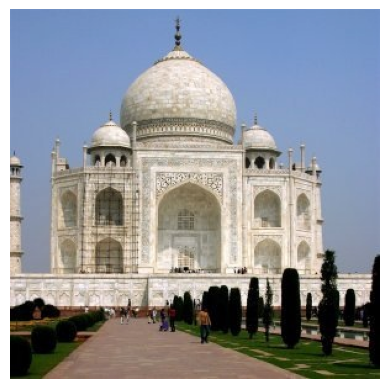

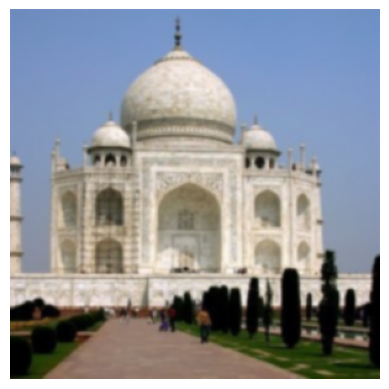

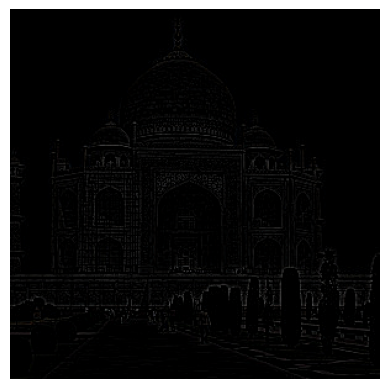

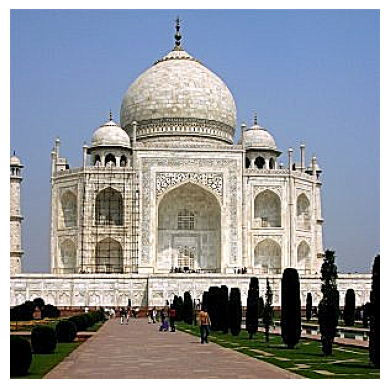

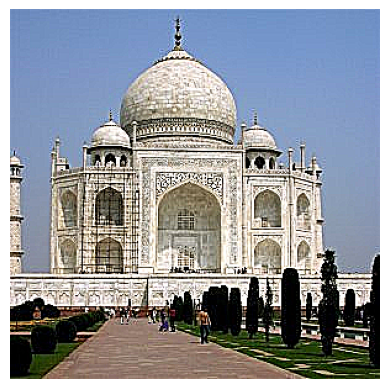

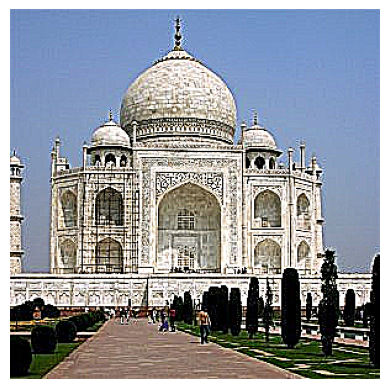

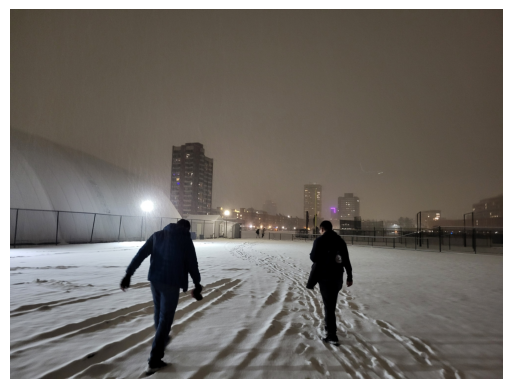

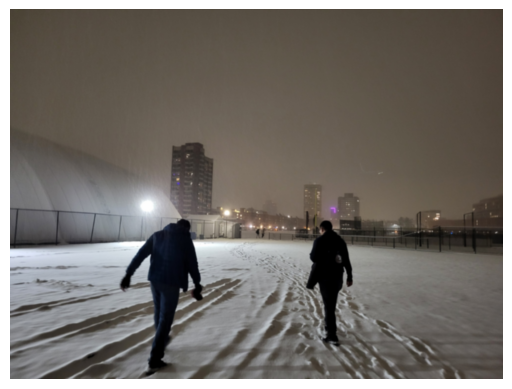

c:\Users\cheet\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\_shared\utils.py:328: UserWarning: out/frozen2_highfreq.jpg is a low contrast image
  return func(*args, **kwargs)


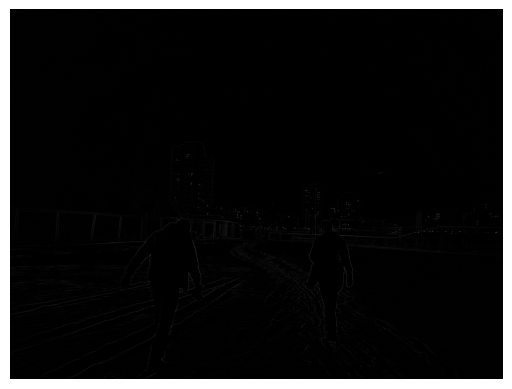

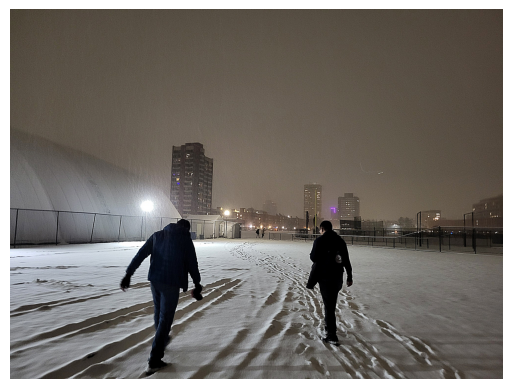

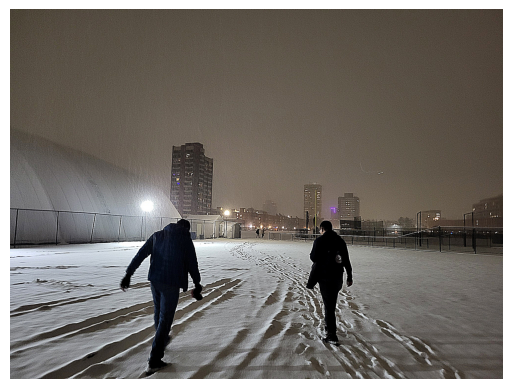

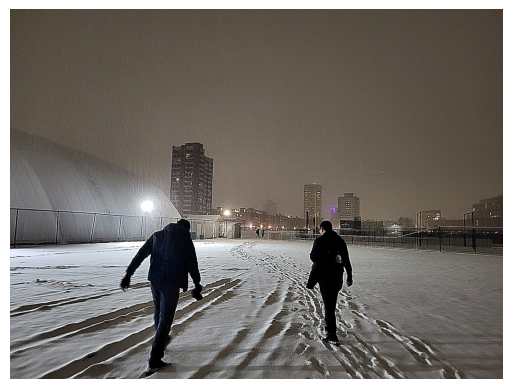

In [1]:
#%matplotlib tk
%reload_ext autoreload
%autoreload 2
from scipy.signal import convolve2d
import numpy as np
import skimage as sk
import skimage.io as skio
import matplotlib.pyplot as plt
import cv2
from utils import apply_to_channels, show_image, gaussian_filter

G = gaussian_filter(1)
alpha = 2

def blurred(im):
    return convolve2d(im, G, mode='same', boundary='symm')

def high_freq(im):
    return np.clip(im - blurred(im), 0, 1)

def sharpen1(im):
    im = im + alpha*(im - convolve2d(im, G, mode='same', boundary='symm'))
    return np.clip(im, 0, 1)

def unsharp(im):
    H = -(alpha * G)
    H[2, 2] += (1 + alpha)
    return np.clip(convolve2d(im, H, mode='same', boundary='symm'), 0, 1)

# Show the blurred, high-frequency, and sharpened versions of the Taj Mahal image, as well as another image of your choice.
im = skio.imread('data/taj.jpg')
im = sk.img_as_float(im)

im_sharp = apply_to_channels(im, unsharp)

show_image(im, 'out/taj_original.jpg')
show_image(apply_to_channels(im, blurred), 'out/taj_blurred.jpg')
show_image(apply_to_channels(im, high_freq), 'out/taj_highfreq.jpg')
show_image(im_sharp, 'out/taj_sharpen2.jpg')

alpha = 4
im_sharp = apply_to_channels(im, unsharp)
show_image(im_sharp, 'out/taj_sharpen4.jpg')

alpha = 6
im_sharp = apply_to_channels(im, unsharp)
show_image(im_sharp, 'out/taj_sharpen6.jpg')

G = gaussian_filter(3)
alpha = 2
s = 'frozen2'
im = skio.imread(f'data/{s}.jpg')
im = sk.img_as_float(im)
im_sharp = apply_to_channels(im, unsharp)
show_image(im, f'out/{s}_original.jpg')
show_image(apply_to_channels(im, blurred), f'out/{s}_blurred.jpg')
show_image(apply_to_channels(im, high_freq), f'out/{s}_highfreq.jpg')
show_image(im_sharp, f'out/{s}_sharpen2.jpg')

alpha = 4
im_sharp = apply_to_channels(im, unsharp)
show_image(im_sharp, f'out/{s}_sharpen4.jpg')

alpha = 6
im_sharp = apply_to_channels(im, unsharp)
show_image(im_sharp, f'out/{s}_sharpen6.jpg')

In [16]:
import os

len(os.listdir('out'))

51

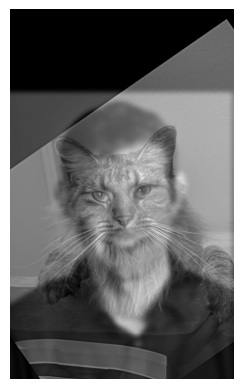

In [6]:
from align_image_code import align_images
from skimage.color import rgb2gray

alignment_points = {
    'data/nutmeg.jpg': [(603, 288), (752, 370)],
    'data/DerekPicture.jpg': [(297, 343), (439, 328)],
    'data/arctic1.jpg': [(884, 841), (1160, 970)],
    'data/arctic2.jpg': [(1255, 405), (1402, 735)],
    'data/quarter.jpg': [(620, 615), (1129, 620)],
    'data/yifan_tahoe.jpg': [ (539, 729), (658, 742)],
    # ((np.float64(1107.280723509792), np.float64(508.0768041929849)), (np.float64(78.09354192373945), np.float64(538.4246313423172)), (np.float64(3739.584323954504), np.float64(2459.0145813734716)), (np.float64(208.4460360899684), np.float64(3401.1166937483968)))
    'data/flag_rsf1.jpg': [(1107, 508), (78, 538)],
    'data/flag_bart.jpg': [(3739, 2459), (208, 3401)],
}

def hybrid_image(im1, im2, sigma1, sigma2, c, save=False):
    G2 = gaussian_filter(sigma2, 2 * (int(2*sigma2+1)-1) + 1)
    low_freq = convolve2d(im2, G2, mode='same', boundary='symm')
    
    G1 = gaussian_filter(sigma1,  2 * (int(2*sigma1+1)-1) + 1)
    high_freq = im1 - c * convolve2d(im1, G1, mode='same', boundary='symm')

    if save:
        show_image(low_freq, 'out/low_freq.jpg')
        show_image(high_freq, 'out/high_freq.jpg')
        show_image(np.log(np.abs(np.fft.fftshift(np.fft.fft2(low_freq)))), 'out/low_freq_fft.jpg')
        show_image(np.log(np.abs(np.fft.fftshift(np.fft.fft2(high_freq)))), 'out/high_freq_fft.jpg')

    hybrid_im = low_freq + high_freq
    return np.clip(hybrid_im / 2, 0, 1)

im1_aligned, im2_aligned = align_images(
    sk.img_as_float(skio.imread('data/nutmeg.jpg')),
    sk.img_as_float(skio.imread('data/DerekPicture.jpg')),
    pts=alignment_points['data/nutmeg.jpg'] + alignment_points['data/DerekPicture.jpg']
)

hybrid = hybrid_image(rgb2gray(im1_aligned), rgb2gray(im2_aligned), 5, 8, 0.3)
show_image(hybrid, 'out/hybrid_derek_nutmeg.jpg')

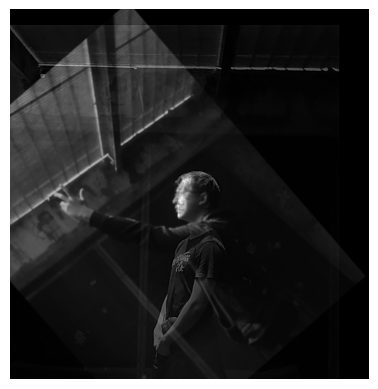

In [15]:
p1,p2 = 'data/arctic2.jpg', 'data/arctic1.jpg'


im1_aligned, im2_aligned = align_images(
    sk.img_as_float(skio.imread(p1)),
    sk.img_as_float(skio.imread(p2)),
    pts=alignment_points.get(p1, None) + alignment_points.get(p2, None)
)

hybrid = hybrid_image(rgb2gray(im2_aligned), rgb2gray(im1_aligned), 5, 3, 0.6)
show_image(np.rot90(hybrid, 3), 'out/hybrid_arctic.jpg')

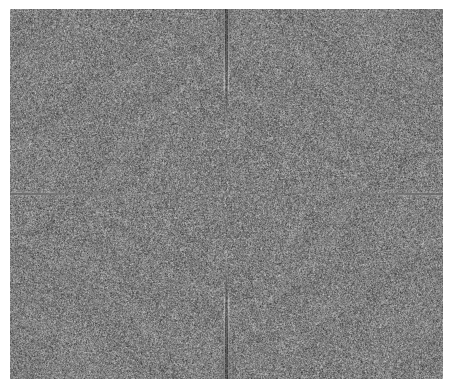

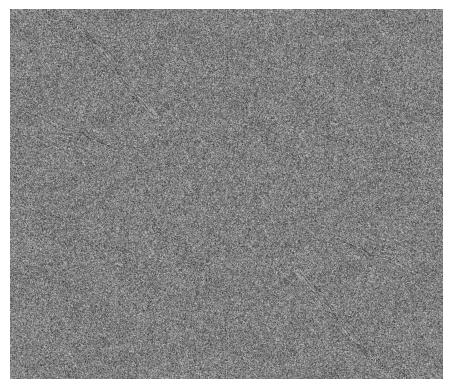

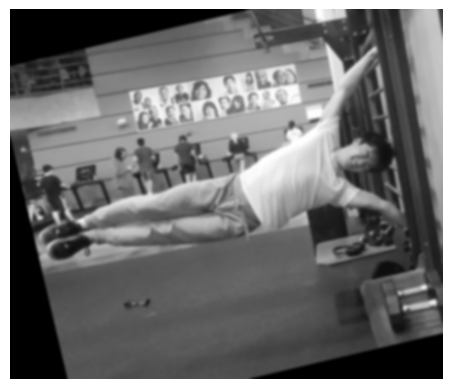

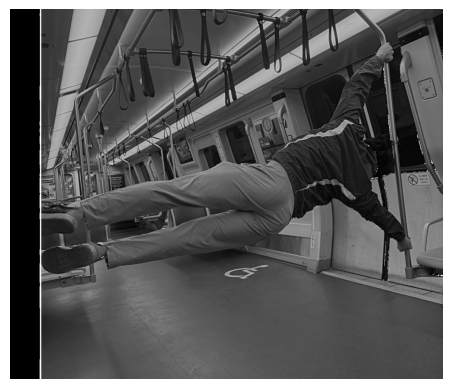

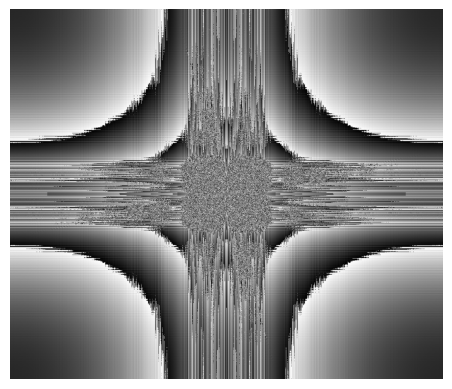

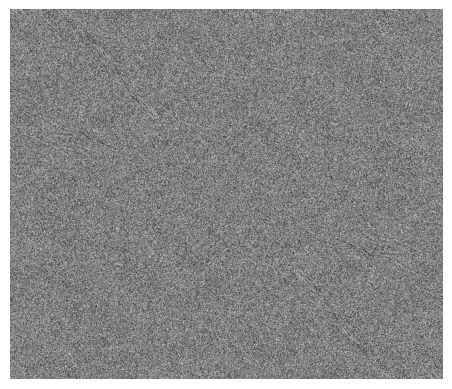

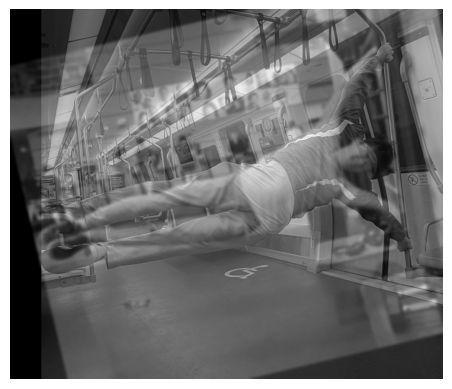

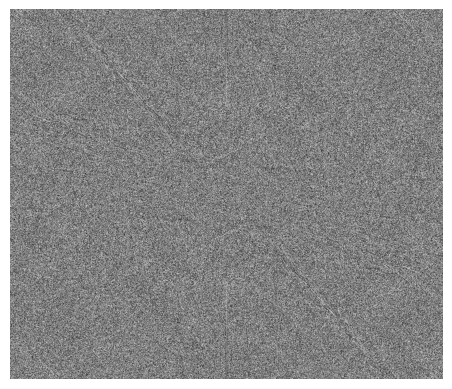

In [7]:
p1, p2='data/flag_rsf1.jpg', 'data/flag_bart.jpg'


im1_aligned, im2_aligned = align_images(
    sk.img_as_float(skio.imread(p1)),
    sk.img_as_float(skio.imread(p2)),
    pts=alignment_points.get(p1, None) + alignment_points.get(p2, None)
)


show_image(np.log(np.abs(np.fft.fftshift(np.fft.fft2(rgb2gray(im1_aligned))))), 'out/flag_rsf1_fft.jpg')
show_image(np.log(np.abs(np.fft.fftshift(np.fft.fft2(rgb2gray(im2_aligned))))), 'out/flag_bart_fft.jpg')
hybrid = hybrid_image(rgb2gray(im2_aligned), rgb2gray(im1_aligned), 3, 4, 0.3, save=True)
show_image(hybrid, 'out/hybrid_flag.jpg')
show_image(np.log(np.abs(np.fft.fftshift(np.fft.fft2(hybrid)))), 'out/hybrid_flag_fft.jpg')

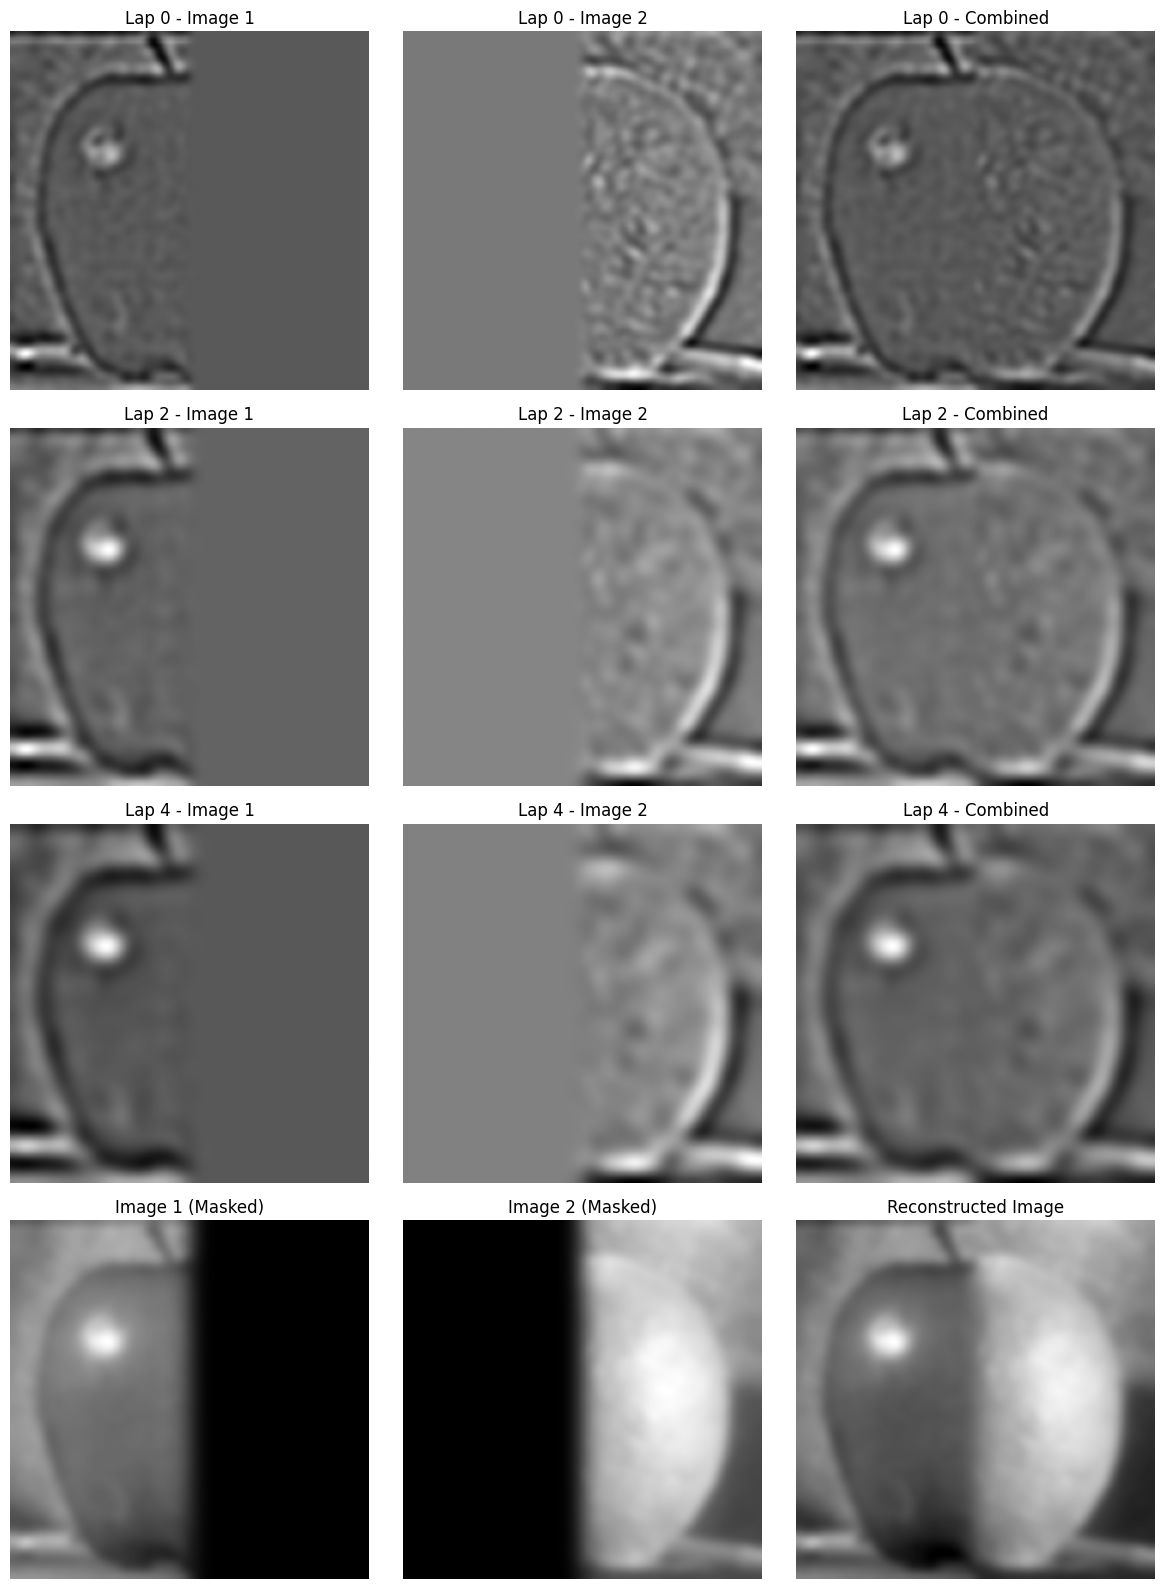

In [8]:
def gaussian_stack(im, num_levels, sigma):
    stack = np.zeros((im.shape[0], im.shape[1], num_levels))
    current_im = im
    for i in range(num_levels):
        G = gaussian_filter(sigma, 2 * (int(2*sigma+1)-1) + 1)
        current_im = convolve2d(current_im, G, mode='same', boundary='symm')
        stack[:, :, i] = current_im
    return stack

def laplacian_stack(im, num_levels, sigma):
    g_stack = gaussian_stack(im, num_levels, sigma)
    stack = np.zeros((im.shape[0], im.shape[1], num_levels))
    for i in range(num_levels - 1):
        stack[:, :, i] = g_stack[:, :, i] - g_stack[:, :, i + 1]
    stack[:, :, num_levels - 1] = g_stack[:, :, num_levels - 1]
    return stack

def plot_laplacian_stacks(im1, im2, mask):
    levels, sigma = 6, 4
    lap1 = laplacian_stack(im1, levels, sigma)
    lap2 = laplacian_stack(im2, levels, sigma)
    GM = gaussian_stack(mask, levels, sigma)
    lap1 = lap1 * GM
    lap2 = lap2 * (1 - GM)
    combined_lap = np.zeros_like(lap1)
    for i in range(levels):
        combined_lap[:, :, i] = lap1[:, :, i] + lap2[:, :, i]

    reconstructed = np.zeros_like(im1)
    im1_reconstructed = np.zeros_like(im1)
    im2_reconstructed = np.zeros_like(im2)
    for i in range(levels):
        reconstructed += combined_lap[:, :, i]
        im1_reconstructed += lap1[:, :, i]
        im2_reconstructed += lap2[:, :, i]

    fig, axs = plt.subplots(4, 3, figsize=(12, 16))
    for i in range(4):
        for j in range(3):
            axs[i, j].axis('off')
    for i, level in enumerate([0, 2, 4]):
        axs[i, 0].imshow(lap1[:, :, level], cmap='gray')
        axs[i, 0].set_title(f'Lap {level} - Image 1')
        axs[i, 1].imshow(lap2[:, :, level], cmap='gray')
        axs[i, 1].set_title(f'Lap {level} - Image 2')
        axs[i, 2].imshow(combined_lap[:, :, level], cmap='gray')
        axs[i, 2].set_title(f'Lap {level} - Combined')

    axs[3, 2].imshow(reconstructed, cmap='gray')
    axs[3, 2].set_title('Reconstructed Image')
    axs[3, 0].imshow(im1_reconstructed, cmap='gray')
    axs[3, 0].set_title('Image 1 (Masked)')
    axs[3, 1].imshow(im2_reconstructed, cmap='gray')
    axs[3, 1].set_title('Image 2 (Masked)')

    plt.tight_layout()
    plt.show()

im1 = sk.img_as_float(skio.imread('data/apple.jpeg'))
im2 = sk.img_as_float(skio.imread('data/orange.jpeg'))
mask = np.zeros((im1.shape[0], im1.shape[1]))
mask[:, :im1.shape[1]//2] = 1
plot_laplacian_stacks(rgb2gray(im1), rgb2gray(im2), mask)

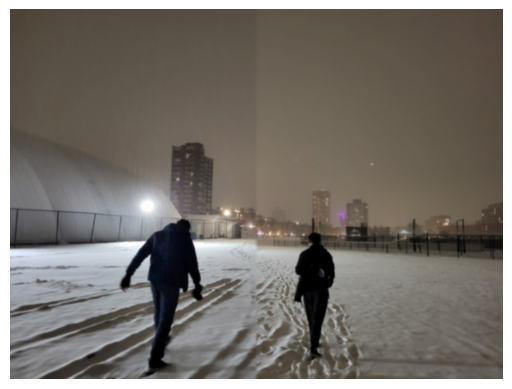

In [9]:
def blend_stack(im1, im2, mask, num_levels=5, sigma=2):
    LA = laplacian_stack(im1, num_levels, sigma)
    LB = laplacian_stack(im2, num_levels, sigma)
    GM = gaussian_stack(mask, num_levels, sigma)

    LS = np.zeros(LA.shape)
    for i in range(num_levels):
        LS[:, :, i] = GM[:, :, i] * LA[:, :, i] + (1 - GM[:, :, i]) * LB[:, :, i]

    blended_im = LS.sum(axis=2)
    return np.clip(blended_im, 0, 1)

im1 = sk.img_as_float(skio.imread('data/apple.jpeg'))
im2 = sk.img_as_float(skio.imread('data/orange.jpeg'))
mask = np.zeros((im1.shape[0], im1.shape[1]))
mask[:, :im1.shape[1] // 2] = 1

for c in range(3):
    im1_channel = im1[:, :, c]
    im2_channel = im2[:, :, c]
    blended_channel = blend_stack(im1_channel, im2_channel, mask, num_levels=20, sigma=2)
    if c == 0:
        blended = np.zeros(im1.shape)
    blended[:, :, c] = blended_channel
# show_image(blended, 'out/apple_orange_blended.jpg')

im1 = sk.img_as_float(skio.imread('data/frozen2.jpg'))
im2 = sk.img_as_float(skio.imread('data/frozen3.jpg'))
im2 = cv2.resize(im2, (im1.shape[1], im1.shape[0]))
mask = np.zeros((im1.shape[0], im1.shape[1]))
mask[:, :im1.shape[1] // 2] = 1

for c in range(3):
    im1_channel = im1[:, :, c]
    im2_channel = im2[:, :, c]
    blended_channel = blend_stack(im1_channel, im2_channel, mask, num_levels=5, sigma=2)
    if c == 0:
        blended = np.zeros(im1.shape)
    blended[:, :, c] = blended_channel
show_image(blended, 'out/frozen2_frozen3_blended.jpg')

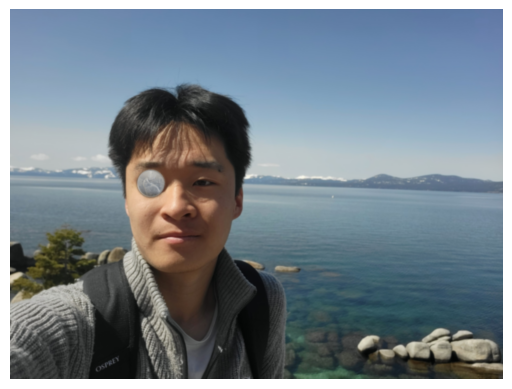

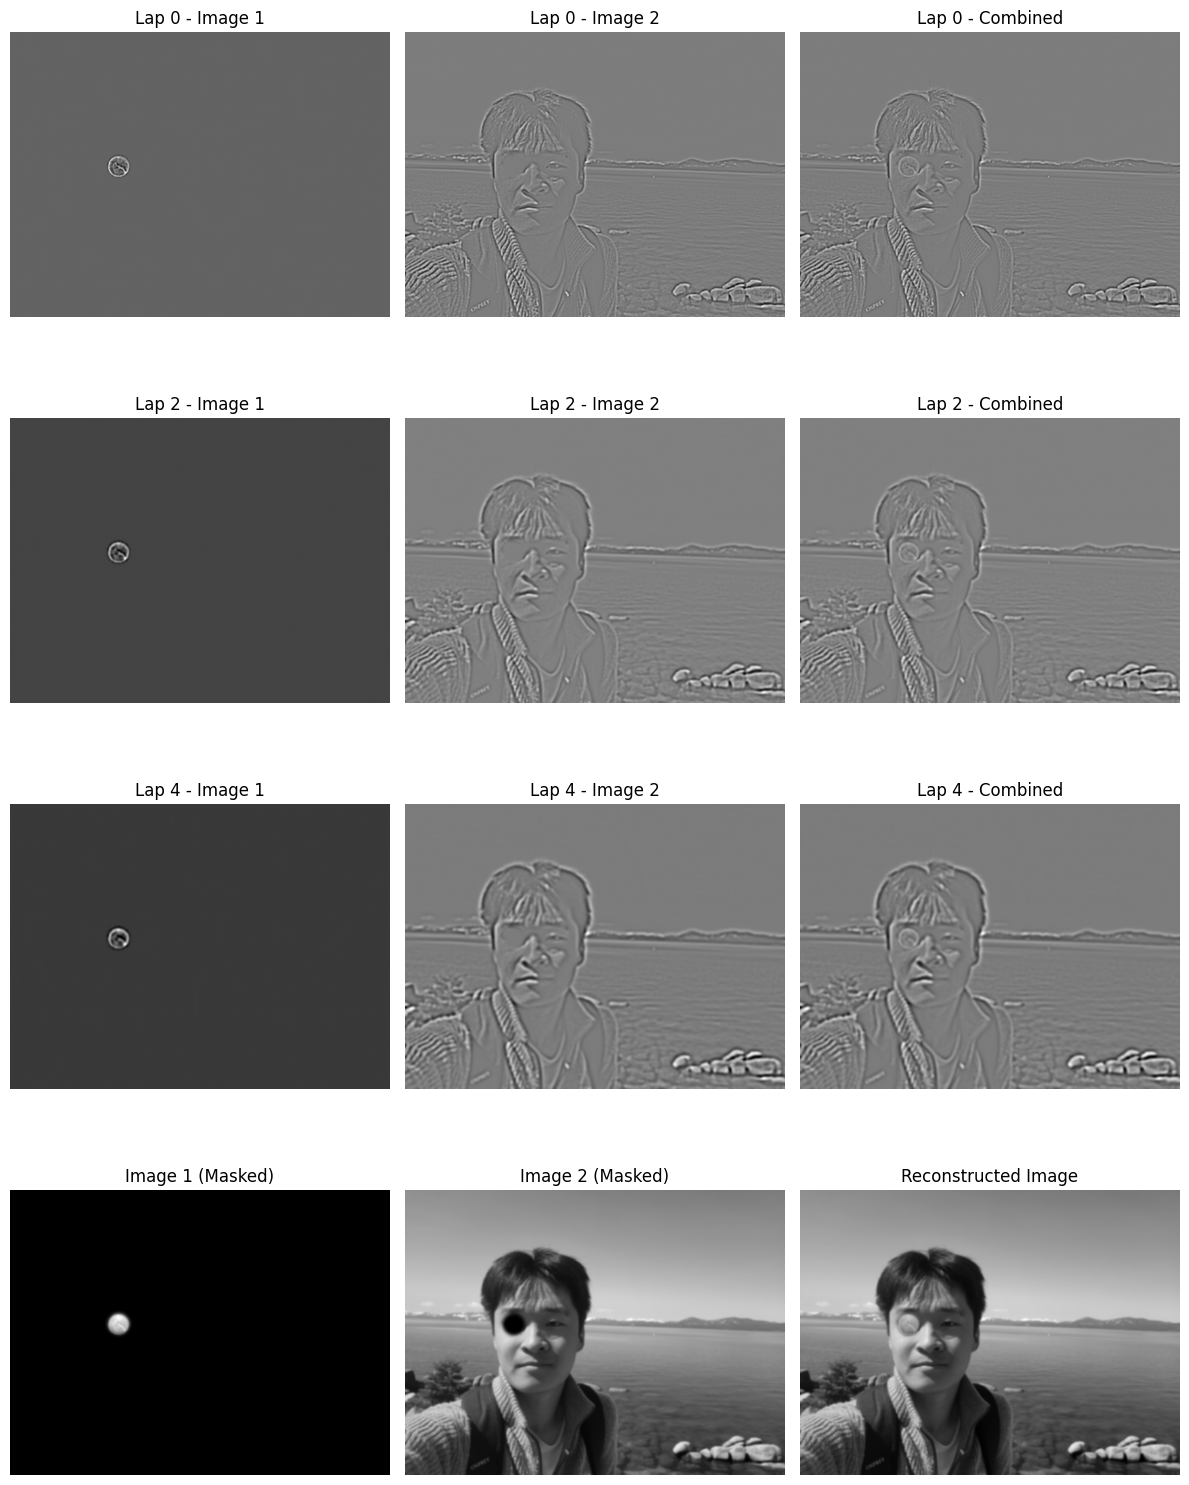

In [6]:
im1 = sk.img_as_float(skio.imread('data/quarter.jpg'))
im2 = sk.img_as_float(skio.imread('data/yifan_tahoe.jpg'))
mask = sk.img_as_float(skio.imread('data/quarter_mask.jpg', as_gray=True)).T

# stack im1 and mask together on channel dimension for alignment
im1 = np.dstack([im1, mask])
im2 = np.dstack([im2, np.ones_like(im2[:, :, 0])])

im1_aligned, im2_aligned = align_images(
    im1,
    im2,
    pts=alignment_points['data/quarter.jpg'] + alignment_points['data/yifan_tahoe.jpg'],
    no_crop=True
)

mask_aligned = im1_aligned[:, :, 3]
im1_aligned, im2_aligned = im1_aligned[:, :, :3], im2_aligned[:, :, :3]

for c in range(3):
    im1_channel = im1_aligned[:, :, c]
    im2_channel = im2_aligned[:, :, c]

    blended_channel = blend_stack(im1_channel, im2_channel, mask_aligned, num_levels=5, sigma=2)
    if c == 0:
        blended = np.zeros(im1_aligned.shape)
    blended[:, :, c] = blended_channel

show_image(blended, 'out/quarter_yifan_tahoe_blended.jpg')
plot_laplacian_stacks(rgb2gray(im1_aligned), rgb2gray(im2_aligned), mask_aligned)